In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pwd
%cd /media/akheel/Windows-SSD/Users/akhee/Documents/Projects/NITK/Major Project/LegalDoc-Retrieval-n-Summarization/

/media/akheel/Windows-SSD/Users/akhee/Documents/Projects/NITK/Major Project/LegalDoc-Retrieval-n-Summarization/SKW_Enhancement/Data_Handling


/media/akheel/Windows-SSD/Users/akhee/Documents/Projects/NITK/Major Project/LegalDoc-Retrieval-n-Summarization


In [3]:
# df = pd.read_csv('/kaggle/input/standard-ner-dataset/standard_NER.csv')
df = pd.read_csv('All_Data/NER_Datasets/Standard_NER_Dataset/standard_NER.csv')
print(f"df.shape: {df.shape}")
df.head()

df.shape: (47959, 2)


,text,labels
0,Thousands of demonstrators have marched throug...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Iranian officials say they expect to get acces...,B-gpe O O O O O O O O O O O O O O B-tim O O O ...
2,Helicopter gunships Saturday pounded militant ...,O O B-tim O O O O O B-geo O O O O O B-org O O ...
3,They left after a tense hour-long standoff wit...,O O O O O O O O O O O
4,U.N. relief coordinator Jan Egeland said Sunda...,B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...


In [4]:
# Split labels based on whitespace and turn them into a list
labels = [i.split() for i in df['labels'].values.tolist()]

# Check how many labels are there in the dataset
unique_labels = set()

for lb in labels:
  [unique_labels.add(i) for i in lb if i not in unique_labels]
 
print(unique_labels)

# Map each label into its id representation and vice versa
# labels_to_ids = {k: v for v, k in enumerate(sorted(unique_labels))}
# ids_to_labels = {v: k for v, k in enumerate(sorted(unique_labels))}

# print(labels_to_ids)

{'B-per', 'I-tim', 'I-eve', 'I-per', 'O', 'B-tim', 'B-geo', 'B-org', 'B-eve', 'B-nat', 'B-gpe', 'I-org', 'I-art', 'B-art', 'I-gpe', 'I-nat', 'I-geo'}


- geo for geographical entity
- org for organization entity
- per for person entity
- gpe for geopolitical entity
- tim for time indicator entity
- art for artifact entity
- eve for event entity
- nat for natural phenomenon entity
- O is assigned if a word doesn’t belong to any entity.

In [5]:
# Flatten the list of lists to get all labels
all_labels = [label for sublist in labels for label in sublist]

# Count the occurrences of each label
label_counts = pd.Series(all_labels).value_counts()

# Print the summary
print("Label Summary:")
print(label_counts)

Label Summary:
O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: count, dtype: int64


In [6]:
# Flatten the list of lists to get all labels
all_base_labels = [label[2:] if label.startswith(('B-', 'I-')) else label for sublist in labels for label in sublist]

# Count the occurrences of each label
label_counts = pd.Series(all_base_labels).value_counts()

# Print the summary without 'I-' and 'B-'
print("Label Summary without 'I-' and 'B-':")
print(label_counts)

Label Summary without 'I-' and 'B-':
O      887908
geo     45058
org     36927
per     34241
tim     26861
gpe     16068
art       699
eve       561
nat       252
Name: count, dtype: int64


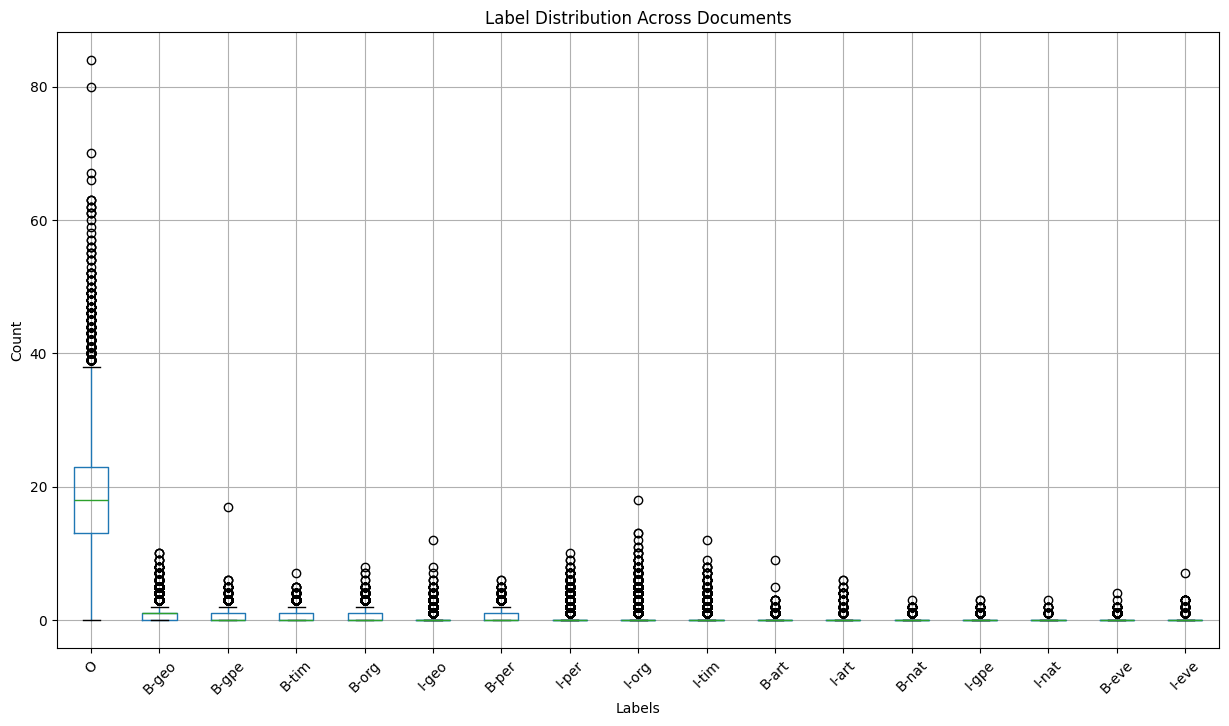

In [7]:
# Create a DataFrame to store the label counts for each document
label_distribution = pd.DataFrame()

# Iterate through each document and count the occurrences of each label
for doc_labels in labels:
    doc_label_counts = pd.Series(doc_labels).value_counts()
    label_distribution = pd.concat([label_distribution, doc_label_counts], axis=1, ignore_index=True)

# Transpose the DataFrame for better visualization
label_distribution = label_distribution.transpose()


# Fill NaN values with 0
label_distribution = label_distribution.fillna(0)

# Plot the distribution
plt.figure(figsize=(15, 8))
label_distribution.boxplot(rot=45)
plt.title('Label Distribution Across Documents')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

<Figure size 1500x800 with 0 Axes>

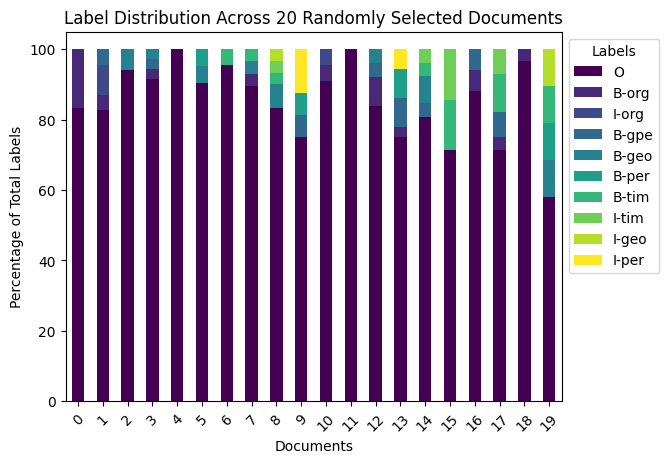

In [10]:
import random

# Randomly select 20 documents
random_documents = random.sample(range(df.shape[0]), 20)

# Extract labels for selected documents
selected_labels = [df['labels'].iloc[i].split() for i in random_documents]

# Create a DataFrame to store the label percentages for each document
label_distribution_percentage = pd.DataFrame()

# Calculate the percentage of each label in each document
for doc_labels in selected_labels:
    total_labels = len(doc_labels)
    doc_label_percentages = pd.Series(doc_labels).value_counts(normalize=True) * 100
    label_distribution_percentage = pd.concat([label_distribution_percentage, doc_label_percentages], axis=1, ignore_index=True)

# Transpose the DataFrame for better visualization
label_distribution_percentage = label_distribution_percentage.transpose()

# Fill NaN values with 0
label_distribution_percentage = label_distribution_percentage.fillna(0)

# Plot the distribution
plt.figure(figsize=(15, 8))
label_distribution_percentage.plot(kind='bar', stacked=True, colormap='viridis', rot=45)
plt.title('Label Distribution Across 20 Randomly Selected Documents')
plt.xlabel('Documents')
plt.ylabel('Percentage of Total Labels')
plt.legend(title='Labels', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1500x800 with 0 Axes>

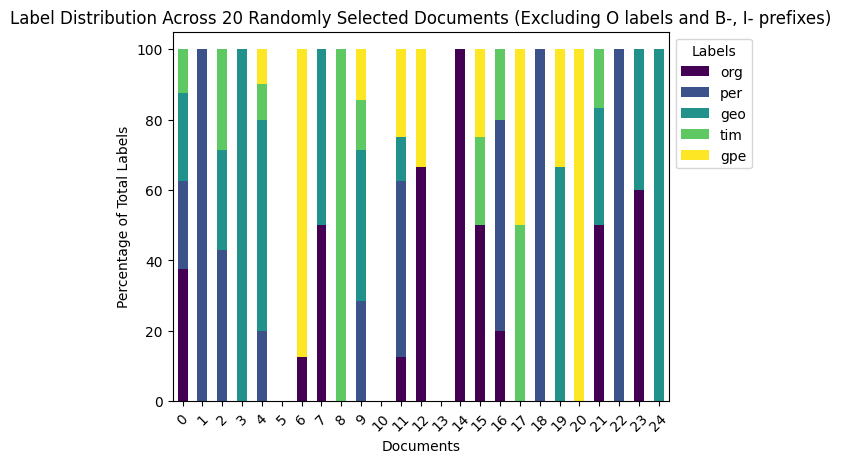

In [14]:
# Randomly select 20 documents
random_documents = random.sample(range(df.shape[0]), 25)

# Extract labels for selected documents
selected_labels = [df['labels'].iloc[i].split() for i in random_documents]

# Create a DataFrame to store the label percentages for each document
label_distribution_percentage = pd.DataFrame()

# Calculate the percentage of each label in each document, excluding 'O' labels and 'B-', 'I-' prefixes
for doc_labels in selected_labels:
    total_labels = len(doc_labels)
    
    # Exclude 'O' labels and remove 'B-', 'I-' prefixes
    valid_labels = [label[2:] if label.startswith(('B-', 'I-')) else label for label in doc_labels if label != 'O']
    
    doc_label_percentages = pd.Series(valid_labels).value_counts(normalize=True) * 100
    label_distribution_percentage = pd.concat([label_distribution_percentage, doc_label_percentages], axis=1, ignore_index=True)

# Transpose the DataFrame for better visualization
label_distribution_percentage = label_distribution_percentage.transpose()

# Fill NaN values with 0
label_distribution_percentage = label_distribution_percentage.fillna(0)

# Plot the distribution
plt.figure(figsize=(15, 8))
label_distribution_percentage.plot(kind='bar', stacked=True, colormap='viridis', rot=45)
plt.title('Label Distribution Across 20 Randomly Selected Documents (Excluding O labels and B-, I- prefixes)')
plt.xlabel('Documents')
plt.ylabel('Percentage of Total Labels')
plt.legend(title='Labels', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1500x800 with 0 Axes>

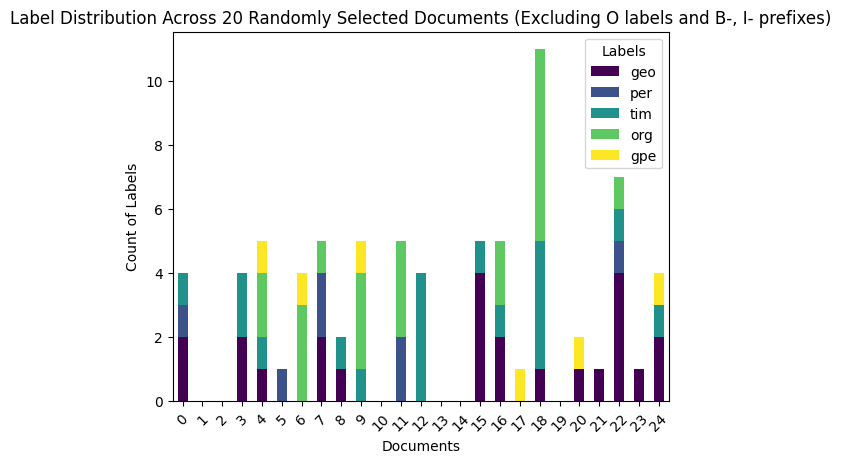

In [25]:
# Randomly select 20 documents
random_documents = random.sample(range(df.shape[0]), 25)

# Extract labels for selected documents
selected_labels = [df['labels'].iloc[i].split() for i in random_documents]

# Create a DataFrame to store the label counts for each document
label_distribution_counts = pd.DataFrame()

# Count the occurrences of each label in each document, excluding 'O' labels and 'B-', 'I-' prefixes
for doc_labels in selected_labels:
    
    # Exclude 'O' labels and remove 'B-', 'I-' prefixes
    valid_labels = [label[2:] if label.startswith(('B-', 'I-')) else label for label in doc_labels if label != 'O']
    
    doc_label_counts = pd.Series(valid_labels).value_counts()
    label_distribution_counts = pd.concat([label_distribution_counts, doc_label_counts], axis=1, ignore_index=True)

# Transpose the DataFrame for better visualization
label_distribution_counts = label_distribution_counts.transpose()

# Fill NaN values with 0
label_distribution_counts = label_distribution_counts.fillna(0)

# Plot the distribution
plt.figure(figsize=(15, 8))
label_distribution_counts.plot(kind='bar', stacked=True, colormap='viridis', rot=45)
plt.title('Label Distribution Across 20 Randomly Selected Documents (Excluding O labels and B-, I- prefixes)')
plt.xlabel('Documents')
plt.ylabel('Count of Labels')
plt.legend(title='Labels', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1500x800 with 0 Axes>

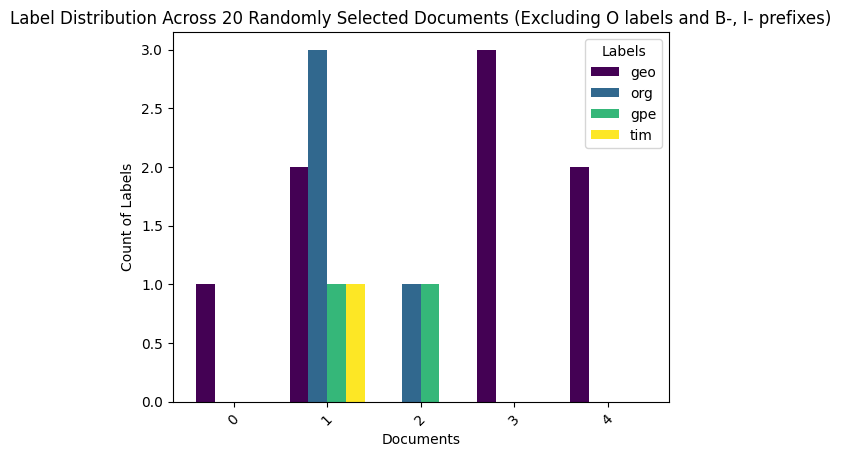

In [29]:
# Randomly select 20 documents
random_documents = random.sample(range(df.shape[0]), 5)

# Extract labels for selected documents
selected_labels = [df['labels'].iloc[i].split() for i in random_documents]

# Create a DataFrame to store the label counts for each document
label_distribution_counts = pd.DataFrame()

# Count the occurrences of each label in each document, excluding 'O' labels and 'B-', 'I-' prefixes
for doc_labels in selected_labels:
    
    # Exclude 'O' labels and remove 'B-', 'I-' prefixes
    valid_labels = [label[2:] if label.startswith(('B-', 'I-')) else label for label in doc_labels if label != 'O']
    
    doc_label_counts = pd.Series(valid_labels).value_counts()
    label_distribution_counts = pd.concat([label_distribution_counts, doc_label_counts], axis=1, ignore_index=True)

# Transpose the DataFrame for better visualization
label_distribution_counts = label_distribution_counts.transpose()

# Fill NaN values with 0
label_distribution_counts = label_distribution_counts.fillna(0)

# Plot the distribution
plt.figure(figsize=(15, 8))
label_distribution_counts.plot(kind='bar', width=0.8, colormap='viridis', rot=45)
plt.title('Label Distribution Across 20 Randomly Selected Documents (Excluding O labels and B-, I- prefixes)')
plt.xlabel('Documents')
plt.ylabel('Count of Labels')
plt.legend(title='Labels', bbox_to_anchor=(1, 1))
plt.show()